In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../../data/fuel-econ.csv')
print(df.shape)
df.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


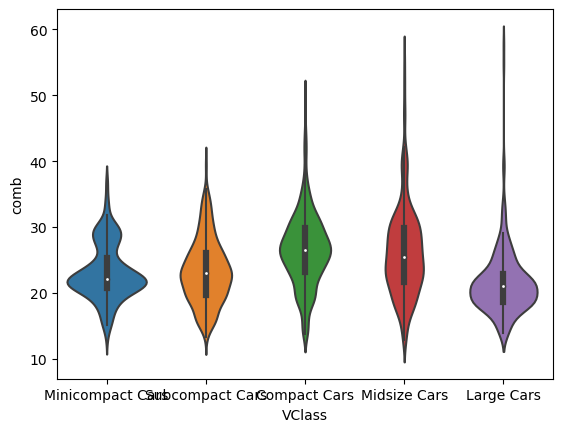

In [3]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories in order from smallest to largest
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the vclass column from a plain object type into an ordered categorical type
df['VClass'] = df['VClass'].astype(vclasses)

sns.violinplot(data=df, x='VClass', y='comb');

Inside each curve, is a miniature *box plot*.

### Example 2 - Without data points in the violin interior

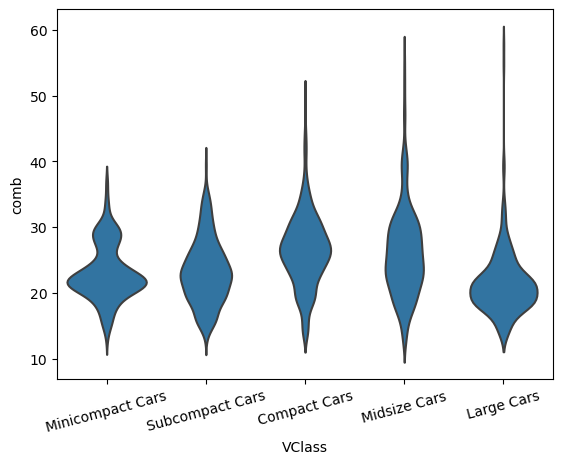

In [4]:
base_color = sns.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior
# It can take any value from {"box", "quartile", "point", "stick", None} where "box" draws a miniature boxplot
sns.violinplot(data=df, x='VClass', y='comb', color=base_color, inner=None);
plt.xticks(rotation=15);

### Example 3 - Quartile information in the middle

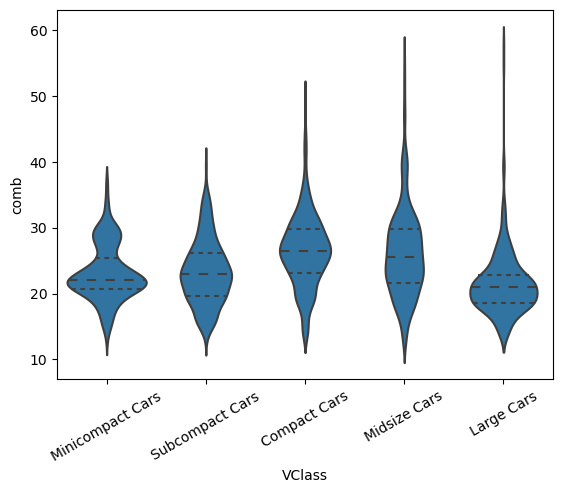

In [5]:
sns.violinplot(data=df, x='VClass', y='comb', color=base_color, inner='quartile')
plt.xticks(rotation=30);

The thick/large dashes equate to the median while the thin/small dashes are the first and third quartiles.

### Example 4 - Horizontal view

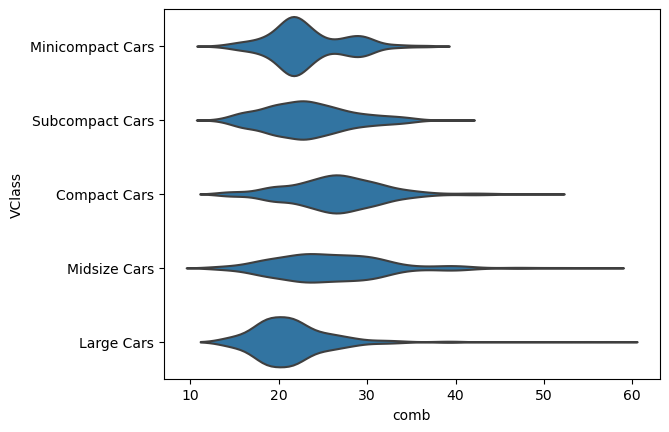

In [6]:
sns.violinplot(data=df, y='VClass', x='comb', color=base_color, inner=None);

### Example 5 - Plot matrix

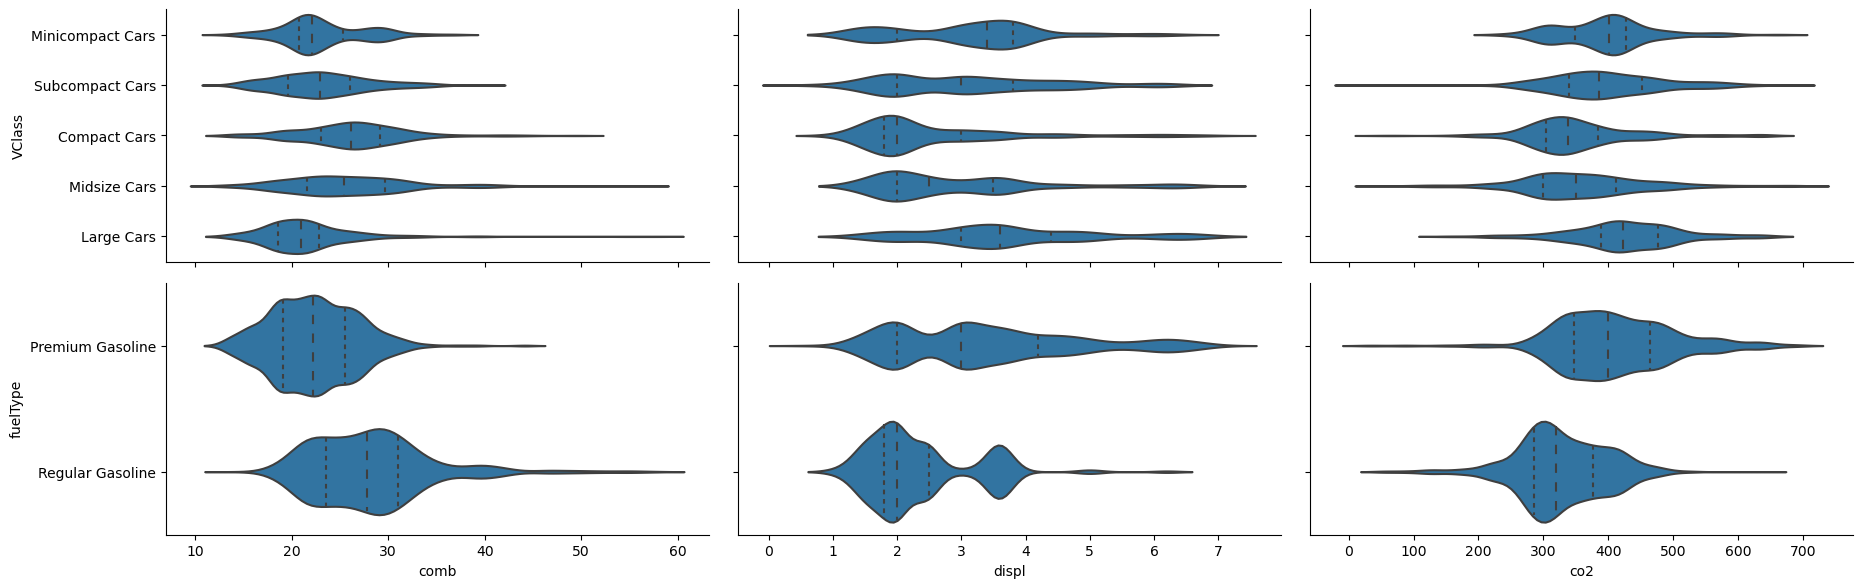

In [8]:
df_sub = df[df['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]

g = sns.PairGrid(data=df_sub, x_vars=['comb', 'displ', 'co2'], y_vars=['VClass', 'fuelType'], height=3, aspect=2)
g.map(sns.violinplot, color=base_color, inner='quartile');